In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import tree
import graphviz

In [56]:
data = pd.read_csv('datalain.csv')

In [57]:
data1 = pd.read_csv('datatot_tes.csv')

In [58]:
data1

,Traffik,Bandwith,Throughput,Link Utilization,Delay,Jitter,Packet Los,Packet Loss,Kongesti Label
0,400,1000,412,0.412,0.023557,0.250,0/35,0.0,tidak kongesti
1,400,1000,400,0.400,0.028819,0.179,0/34,0.0,tidak kongesti
2,400,1000,400,0.400,0.029532,0.236,0/34,0.0,tidak kongesti
3,400,1000,400,0.400,0.029201,0.312,0/34,0.0,tidak kongesti
4,400,1000,400,0.400,0.030066,0.260,0/34,0.0,tidak kongesti
...,...,...,...,...,...,...,...,...,...
1795,2000,1000,976,0.976,0.012102,0.508,87/170,51.0,kongesti berat
1796,2000,1000,976,0.976,0.012121,0.585,88/171,51.0,kongesti berat
1797,2000,1000,964,0.964,0.012064,0.701,87/169,51.0,kongesti berat
1798,2000,1000,976,0.976,0.012097,0.804,88/171,51.0,kongesti berat


In [61]:
del data['No']

In [63]:
data2 = data.dropna()

In [66]:
data2

,Traffik,Throughput,Bandwidth,Link Utilization,Delay,Jitter,Packet Loss,Kongesti Label
0,400.0,407.0,1000.0,0.407,29.293206,0.210,0.0,Tidak Kongesti
1,400.0,400.0,1000.0,0.400,29.306695,0.214,0.0,Tidak Kongesti
2,400.0,400.0,1000.0,0.400,29.320793,0.189,0.0,Tidak Kongesti
3,400.0,400.0,1000.0,0.400,29.307518,0.169,0.0,Tidak Kongesti
4,400.0,400.0,1000.0,0.400,29.317384,0.200,0.0,Tidak Kongesti
...,...,...,...,...,...,...,...,...
145,2000.0,972.0,1000.0,0.972,12.100900,0.745,42.0,Kongesti Berat
146,2000.0,972.0,1000.0,0.972,12.096529,0.561,42.0,Kongesti Berat
147,2000.0,970.0,1000.0,0.970,12.115987,0.760,42.0,Kongesti Berat
148,2000.0,970.0,1000.0,0.970,12.110110,6.692,50.0,Kongesti Berat


In [73]:
y = data2[['Kongesti Label']].copy()
klasifikasi_kongesti = ['Throughput', 'Bandwidth', 'Link Utilization', 'Delay', 'Jitter', 'Packet Loss']
x = data2[klasifikasi_kongesti].copy()

In [74]:
x

,Throughput,Bandwidth,Link Utilization,Delay,Jitter,Packet Loss
0,407.0,1000.0,0.407,29.293206,0.210,0.0
1,400.0,1000.0,0.400,29.306695,0.214,0.0
2,400.0,1000.0,0.400,29.320793,0.189,0.0
3,400.0,1000.0,0.400,29.307518,0.169,0.0
4,400.0,1000.0,0.400,29.317384,0.200,0.0
...,...,...,...,...,...,...
145,972.0,1000.0,0.972,12.100900,0.745,42.0
146,972.0,1000.0,0.972,12.096529,0.561,42.0
147,970.0,1000.0,0.970,12.115987,0.760,42.0
148,970.0,1000.0,0.970,12.110110,6.692,50.0


In [75]:
y

,Kongesti Label
0,Tidak Kongesti
1,Tidak Kongesti
2,Tidak Kongesti
3,Tidak Kongesti
4,Tidak Kongesti
...,...
145,Kongesti Berat
146,Kongesti Berat
147,Kongesti Berat
148,Kongesti Berat


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
kongesti_classifier = DecisionTreeClassifier(max_leaf_nodes=5, random_state=10)
kongesti_classifier.fit(x_train, y_train)
predictions = kongesti_classifier.predict(x_test)

In [77]:
predictions[:10]

array(['Kongesti Berat', 'Kongesti Berat', 'Tidak Kongesti',
       'Kongesti Berat', 'Tidak Kongesti', 'Kongesti Berat',
       'Kongesti Berat', 'Kongesti Berat', 'Kongesti', 'Tidak Kongesti'],
      dtype=object)

In [78]:
y_test['Kongesti Label'][:10]

87     Kongesti Berat
111    Kongesti Berat
10     Tidak Kongesti
91     Kongesti Berat
49     Tidak Kongesti
60     Kongesti Berat
72     Kongesti Berat
67     Kongesti Berat
39           Kongesti
55     Tidak Kongesti
Name: Kongesti Label, dtype: object

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', kongesti_classifier.score(x_train, y_train))
print('Testing Accuracy :', kongesti_classifier.score(x_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, predictions)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 1.0

Confusion matrix:
[[ 5  0  0]
 [ 0 26  0]
 [ 0  0 14]]

Classification report:
                precision    recall  f1-score   support

      Kongesti       1.00      1.00      1.00         5
Kongesti Berat       1.00      1.00      1.00        26
Tidak Kongesti       1.00      1.00      1.00        14

      accuracy                           1.00        45
     macro avg       1.00      1.00      1.00        45
  weighted avg       1.00      1.00      1.00        45



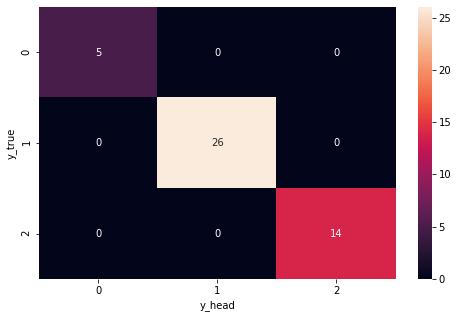

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

[Text(418.5, 566.25, 'Packet Loss <= 1.3\ngini = 0.519\nsamples = 105\nvalue = [7, 64, 34]\nclass = Kongesti'),
 Text(279.0, 339.75, 'Link Utilization <= 0.801\ngini = 0.283\nsamples = 41\nvalue = [7, 0, 34]\nclass = Kongesti Berat'),
 Text(139.5, 113.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = Kongesti Berat'),
 Text(418.5, 113.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]\nclass = Tidak Kongesti'),
 Text(558.0, 339.75, 'gini = 0.0\nsamples = 64\nvalue = [0, 64, 0]\nclass = Kongesti')]

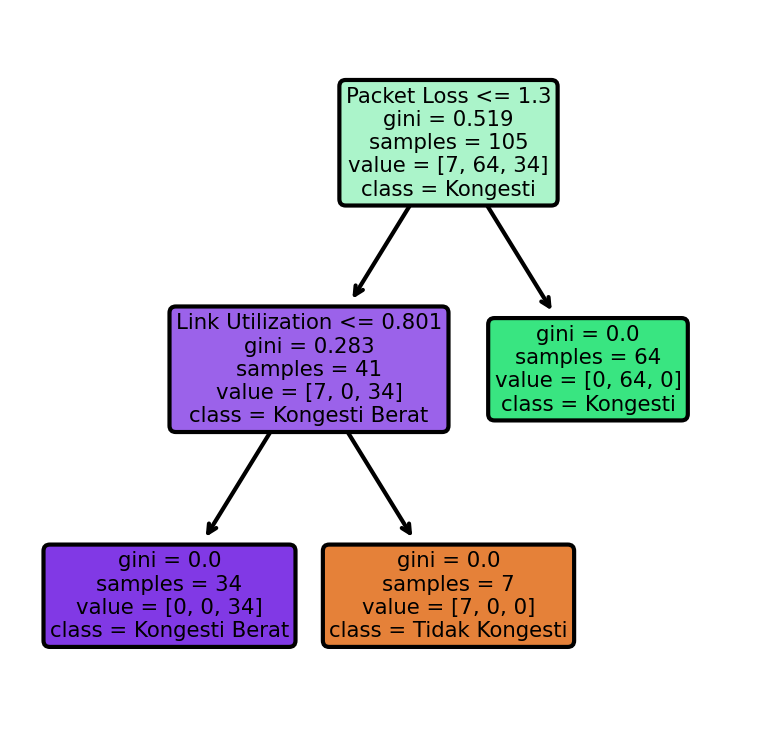

In [54]:
a = ['Link Utilization', 'Delay', 'Jitter', 'Packet Loss']
b = ['Tidak Kongesti', 'Kongesti', 'Kongesti Berat']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(kongesti_classifier,feature_names = a, class_names=b,filled = True,  rounded=True)


<function matplotlib.pyplot.show(close=None, block=None)>

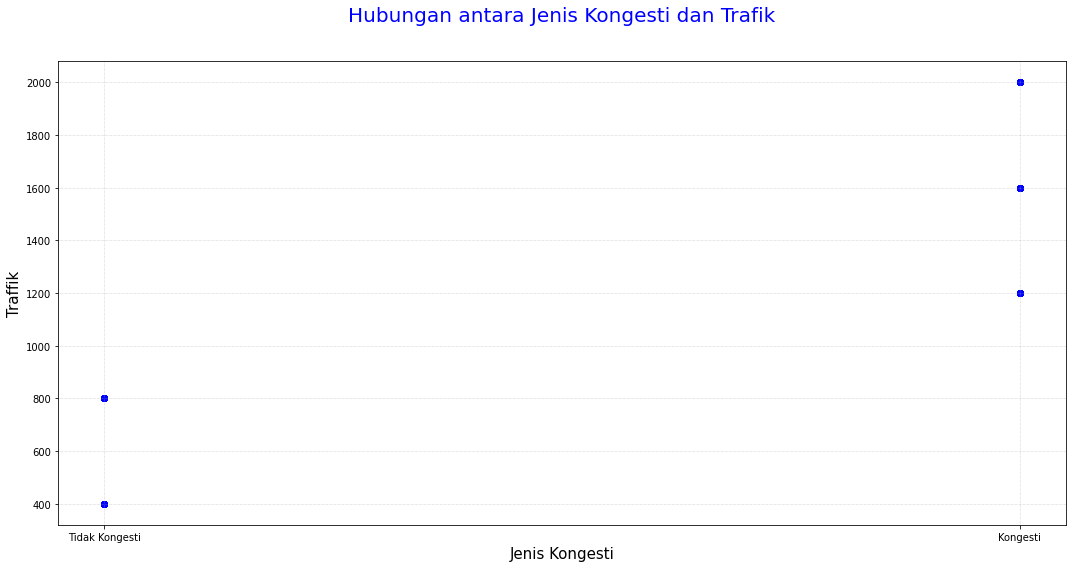

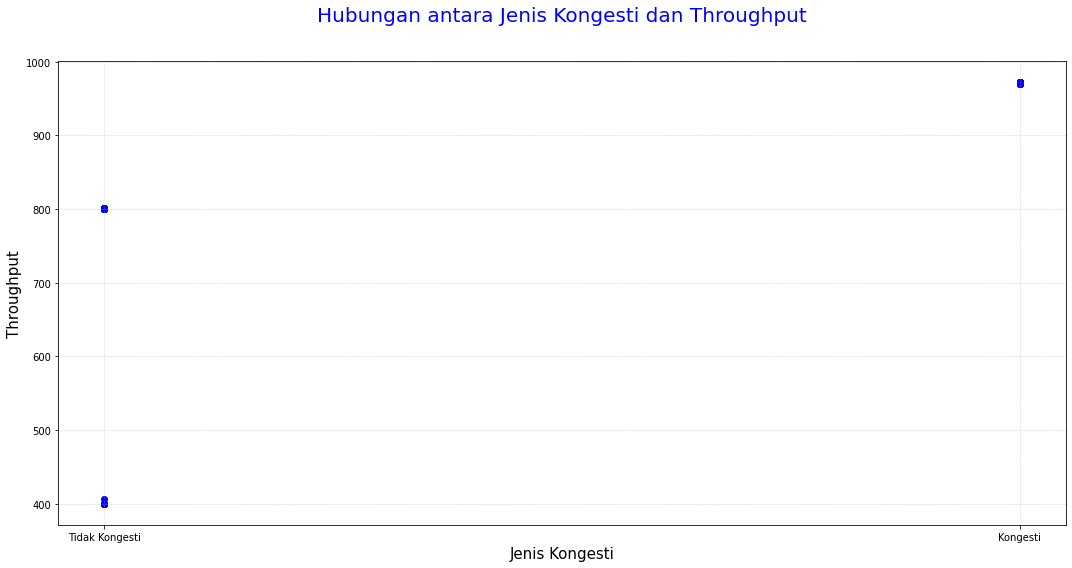

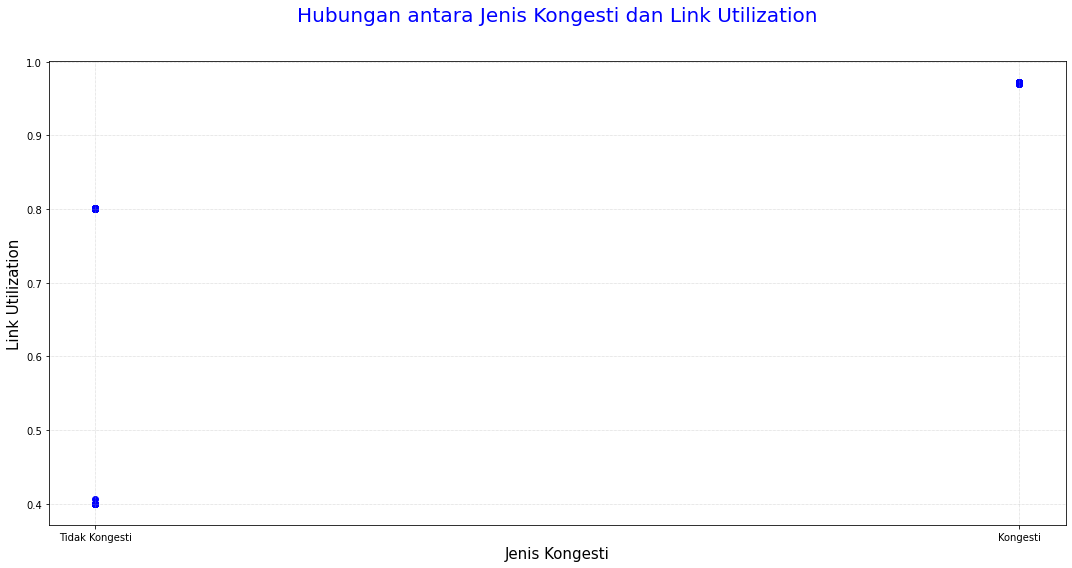

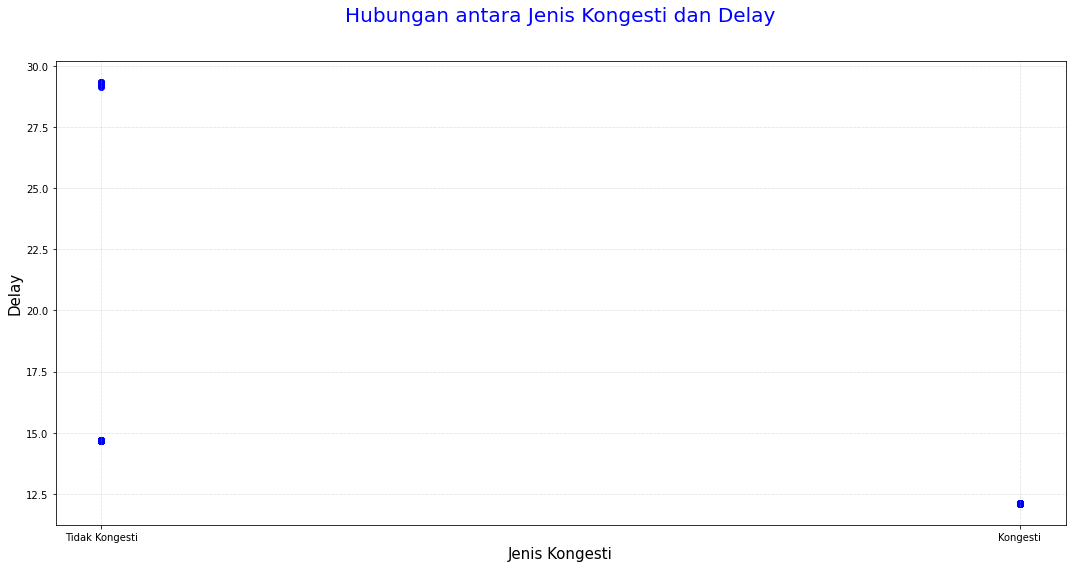

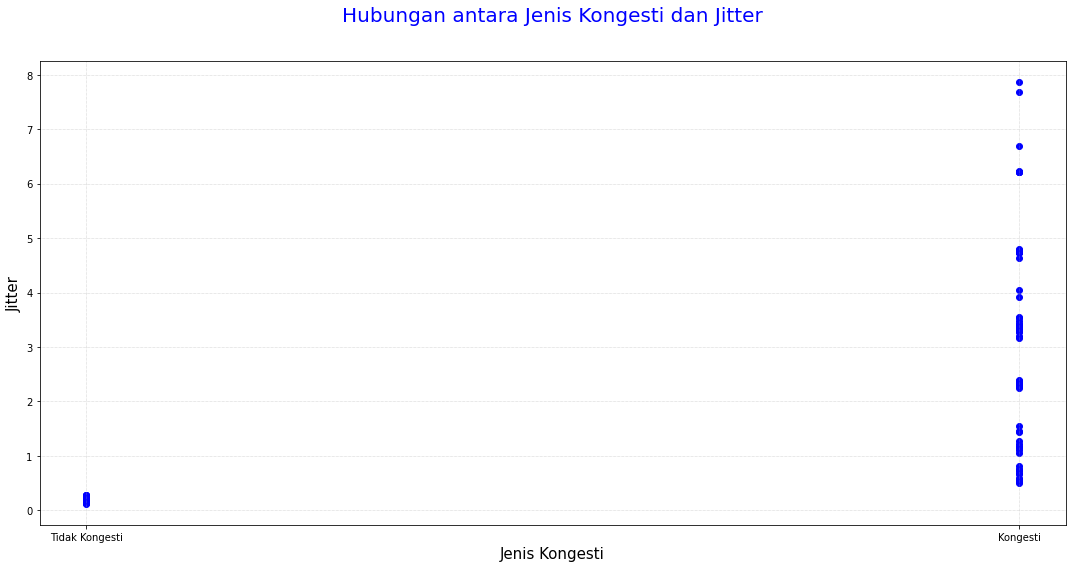

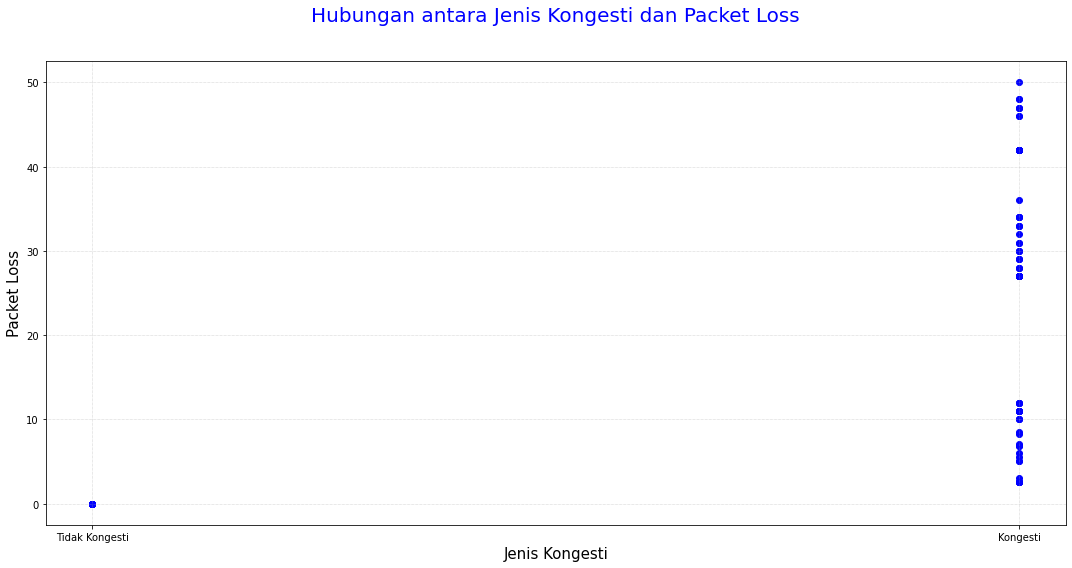

In [30]:
fig = plt.figure(figsize=(15,8))
plt.scatter(y['Kongesti Label'],x['Traffik'], c='blue')
plt.title('Hubungan antara Jenis Kongesti dan Trafik', loc='center', pad=40, fontsize=20, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xlabel('Jenis Kongesti', fontsize = 15)
plt.ylabel('Traffik', fontsize = 15)
plt.tight_layout()
plt.savefig('1.png')
plt.show

fig = plt.figure(figsize=(15,8))
plt.scatter(y['Kongesti Label'],x['Throughput'], c='blue')
plt.title('Hubungan antara Jenis Kongesti dan Throughput', loc='center', pad=40, fontsize=20, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xlabel('Jenis Kongesti', fontsize = 15)
plt.ylabel('Throughput', fontsize = 15)
plt.tight_layout()
plt.savefig('2.png')
plt.show

fig = plt.figure(figsize=(15,8))
plt.scatter(y['Kongesti Label'],x['Link Utilization'], c='blue')
plt.title('Hubungan antara Jenis Kongesti dan Link Utilization', loc='center', pad=40, fontsize=20, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xlabel('Jenis Kongesti', fontsize = 15)
plt.ylabel('Link Utilization', fontsize = 15)
plt.tight_layout()
plt.savefig('3.png')
plt.show

fig = plt.figure(figsize=(15,8))
plt.scatter(y['Kongesti Label'],x['Delay'], c='blue')
plt.title('Hubungan antara Jenis Kongesti dan Delay', loc='center', pad=40, fontsize=20, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xlabel('Jenis Kongesti', fontsize = 15)
plt.ylabel('Delay', fontsize = 15)
plt.tight_layout()
plt.savefig('4.png')
plt.show

fig = plt.figure(figsize=(15,8))
plt.scatter(y['Kongesti Label'],x['Jitter'], c='blue')
plt.title('Hubungan antara Jenis Kongesti dan Jitter', loc='center', pad=40, fontsize=20, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xlabel('Jenis Kongesti', fontsize = 15)
plt.ylabel('Jitter', fontsize = 15)
plt.tight_layout()
plt.savefig('5.png')
plt.show

fig = plt.figure(figsize=(15,8))
plt.scatter(y['Kongesti Label'],x['Packet Loss'], c='blue')
plt.title('Hubungan antara Jenis Kongesti dan Packet Loss', loc='center', pad=40, fontsize=20, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xlabel('Jenis Kongesti', fontsize = 15)
plt.ylabel('Packet Loss', fontsize = 15)
plt.tight_layout()
plt.savefig('6.png')
plt.show

In [61]:
x_train

,Link Utilization,Delay,Jitter,Packet Loss
32,0.801,14.681264,0.184,0.0
52,0.800,14.680534,0.227,0.0
70,0.972,12.096254,3.357,2.6
121,0.972,12.104346,1.215,48.0
144,0.972,12.096472,0.690,42.0
...,...,...,...,...
113,0.971,12.101777,4.756,34.0
64,0.972,12.096419,3.542,2.6
15,0.400,29.312291,0.188,0.0
125,0.972,12.099430,0.529,42.0


In [64]:
x_test.shape

(45, 4)

In [80]:
kongesti_classifier.feature_importances_

array([0.78703278, 0.        , 0.21296722, 0.        , 0.        ,
       0.        ])